In [3]:
import numpy as np
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
state_wheather = ("sunny", "cloudy", "rainy")

Задание 1. Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [14]:
import numpy as np
import random
states=np.empty(20000,dtype= 'object')
state_wheather = ("sunny", "cloudy", "rainy")
b = np.random.choice(state_wheather)
d[0]='sunny'
d[1]='cloudy'
d[2]='rainy'
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
for i in range(20000):
    b = np.random.choice(state_wheather,p = transition_matrix[d[b]])
    states[i]=b
print(states[:20000])


['rainy' 'rainy' 'rainy' ... 'rainy' 'rainy' 'cloudy']


Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды. Должна получиться примерно следующая картинка:

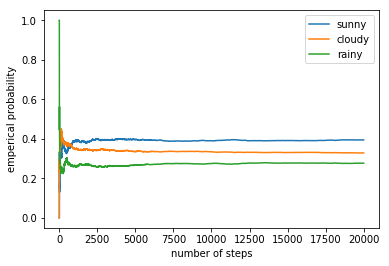

In [16]:
import matplotlib.pyplot as plt
sunny=np.empty(20000)
cloudy=np.empty(20000)
rainy=np.empty(20000)
sunny=[(states[:n+1]=='sunny').sum()/(n+1) for n in range(20000)]
cloudy=[(states[:n+1]=='cloudy').sum()/(n+1) for n in range(20000)]
rainy=[(states[:n+1]=='rainy').sum()/(n+1) for n in range(20000) ]
plt.plot(np.arange(20000),sunny,label="sunny")
plt.plot(np.arange(20000),cloudy,label="cloudy")
plt.plot(np.arange(20000),rainy,label="rainy")
plt.xlabel('number of steps')
plt.ylabel('emperical probability')
plt.legend()
plt.show()

Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [26]:
s=np.array([sunny[19999],cloudy[19999],rainy[19999]])
print(s)
print(np.dot(s,transition_matrix))

[0.3943  0.32865 0.27705]
[0.390585 0.332865 0.27655 ]


In [29]:
print( np.linalg.matrix_power(transition_matrix, 100) )

[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


Задание 4. Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

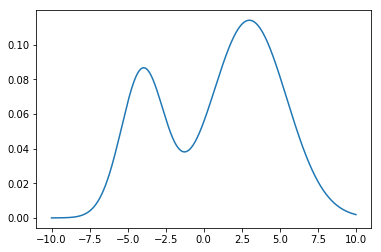

In [30]:
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y)
plt.show()

In [31]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

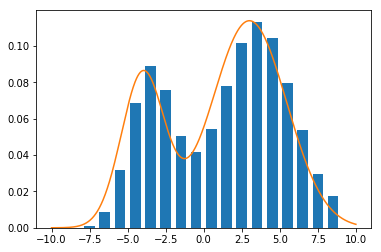

In [38]:
value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1])+10) % 20 - 10
post = metroplis(1, value, proposal, 10000)
plt.hist(post, bins=np.arange(20) - 10, rwidth=0.7, density=True)

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y)
plt.show()